Preprocess food dataset

In [1]:
import numpy as np
import os
import pandas as pd

In [69]:
current_working_directory = os.getcwd()

# Set location to Datasets
dataset_location = current_working_directory + '\\datasets\\Food_recommender\\'

print(dataset_location)


d:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\backend\preprocessing\datasets\Food_recommender\


In [70]:
# File list
file_list = ['Appetizers.csv', 'Beverages.csv', 'Breads.csv', 'Breakfast.csv',
             'Desserts.csv', 'Dressings.csv', 'Main.csv', 'Salads.csv', 'Sandwiches.csv', 'Snacks.csv', 'Soups.csv']

combined_csv = pd.concat([pd.read_csv(dataset_location + file)
                         for file in file_list], ignore_index=True)
combined_csv.shape


(1500, 18)

In [71]:
# Remove duplicate rows
food_data = combined_csv.drop_duplicates()
print(food_data.shape)

# Check if any more duplicate rows
df2 = food_data[food_data.duplicated()]
df2.shape


(1222, 18)


(0, 18)

In [72]:
food_data.head()

,name,servings,ingredients,directions,type,calories,cholesterol,fat,carbohydrates,fiber,sugars,protein,calcium,iron,vitamin_a,vitamin_c,vitamin_d,folate
0,Ambrosia,8 servings,"['1 can pineapple chunks (in juice, 20 oz., dr...",['Drain pineapple and oranges. Use juice as be...,Appetizers,139,2 mg,2 g,31 g,2 g,26 g,3 g,70 mg,1 mg,27 mcg RAE,20 mg,0 mcg,13 mcg DFE
1,Baked Cauliflower Tots,3 Servings,['2 cups grated or finely chopped cauliflower ...,"['Wash hands with soap and water.', 'Preheat o...",Appetizers,107,72 mg,5 g,9 g,2 g,1 g,7 g,93 mg,1 mg,52 mcg RAE,32 mg,0 mcg,70 mcg DFE
2,Baked Chicken Nuggets,4 servings,"['1 1/2 pounds chicken thighs, boneless, skinl...",['Remove skin and bone; cut thighs into bite-s...,Appetizers,175,67 mg,8 g,7 g,1 g,1 g,18 g,13 mg,3 mg,54 mcg RAE,2 mg,0 mcg,45 mcg DFE
3,Baked Tortilla Chips,6 Servings,"['3 whole wheat flour tortillas, 10"" across (o...","['Wash hands with soap and water.', 'Preheat o...",Appetizers,93,0 mg,1 g,20 g,2 g,0 g,3 g,8 mg,1 mg,0 mcg RAE,0 mg,0 mcg,22 mcg DFE
4,Beet & White Bean Salad,4 Servings,[],['Prepare dressing: In small bowl combine cide...,Appetizers,420,13 mg,29 g,29 g,7 g,5 g,14 g,169 mg,3 mg,34 mcg RAE,3 mg,0 mcg,122 mcg DFE


In [73]:
# Write combined csv into new csv
food_data.to_csv(dataset_location + 'food_data.csv', index=False)


In [88]:
import random

csv_file = 'D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\preprocessing\\cleanedDatasets\\ratings_cleaned.csv'
rating = pd.read_csv(csv_file)

# Print rows with food_id greater than 1117 - to check if they exists
rating = rating[rating.food_id > 1117]

# Randomly choose food_id between the range of values greater than 1117
def clean(x):
    if x > 1117:
        return random.randrange(1, 1118)
    else:
        return x

rating['food_id'] = rating['food_id'].apply(lambda food_id: clean(x=food_id))

rating.head()

# Write the modified ratings
rating.to_csv('D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\preprocessing\\cleanedDatasets\\' + 'ratings_cleaned.csv', index=False)

(100004, 3)
(72853, 3)


Preprocess ADL datasets

In [164]:
import re

dataset_location = 'D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\preprocessing\\datasets\\Activity_predictor\\request\\'

# with open(dataset_location + 'data-1.txt', 'rt') as infile, open(dataset_location + 'data.csv', 'w') as outfile:
#     for line in infile:
#         if re.search(r'\d+$', line.strip()):
#             modified_line = line.strip() + ',\n'
#         else:
#             modified_line = line

#         outfile.write(modified_line.replace('\t', ',').replace(' ', '_').replace('ON\n', 'ON,\n').replace('OFF\n', 'OFF,\n'))
# infile.close()
# outfile.close()

# # Read CSV
# csv_file = pd.read_csv(dataset_location + 'data.csv', header=None)

# # Adding header
# headerList = ['datetime', 'sensor_id', 'sensor_status', 'activity']

# converting data frame to csv
# csv_file.to_csv(dataset_location + 'data.csv',header=headerList, index=False)
csv_file = pd.read_csv(dataset_location + 'data.csv')
csv_file['datetime'] = csv_file['datetime'].str.replace('_', ' ')
csv_file.head()

,datetime,sensor_id,sensor_status,activity
0,2009-04-02 07:12:05.002864,M005,ON,Cook_begin
1,2009-04-02 07:12:05.999979,M002,ON,NaN
2,2009-04-02 07:12:08.061644,M006,ON,NaN
3,2009-04-02 07:12:09.655459,M005,OFF,NaN
4,2009-04-02 07:12:10.656179,M002,OFF,NaN


In [147]:
import warnings
warnings.filterwarnings("ignore")

subset_file = csv_file.dropna()
subset_file.drop(['sensor_id', 'sensor_status'], axis=1, inplace=True)
subset_file['datetime'] = (subset_file['date'] + ' ' + subset_file['time'])
subset_file.head()

,date,time,activity,datetime
0,2009-02-02,07:15:16.575809,R1_Bed_to_Toilet_begin,2009-02-02 07:15:16.575809
80,2009-02-02,07:21:03.792759,R1_Bed_to_Toilet_end,2009-02-02 07:21:03.792759
81,2009-02-02,07:21:04.014729,R1_Personal_Hygiene_begin,2009-02-02 07:21:04.014729
182,2009-02-02,07:38:33.946559,R1_Personal_Hygiene_end,2009-02-02 07:38:33.946559
183,2009-02-02,07:44:12.597919,R2_Bed_to_Toilet_begin,2009-02-02 07:44:12.597919


In [149]:
subset_file.loc[subset_file['activity'].str.startswith('R'), 'activity_name'] = subset_file['activity'].str.split('_', n=1, expand=True)[1]
subset_file.loc[~subset_file['activity'].str.startswith('R'), 'activity_name'] = subset_file['activity']

subset_file.loc[subset_file['activity'].str.startswith('R'), 'user_id'] = subset_file['activity'].str.split('_', n=1, expand=True)[0]
subset_file.loc[~subset_file['activity'].str.startswith('R'), 'user_id'] = 'Both'

subset_file['activity_name'] = subset_file['activity_name'].replace("_begin", "", regex=True)
subset_file['activity_name'] = subset_file['activity_name'].replace("_end", "", regex=True)

subset_file.head()

# subset_file.to_csv(dataset_location + 'ADL_merged.csv', index=False)

,date,time,activity,datetime,activity_name,user_id
0,2009-02-02,07:15:16.575809,R1_Bed_to_Toilet_begin,2009-02-02 07:15:16.575809,Bed_to_Toilet,R1
80,2009-02-02,07:21:03.792759,R1_Bed_to_Toilet_end,2009-02-02 07:21:03.792759,Bed_to_Toilet,R1
81,2009-02-02,07:21:04.014729,R1_Personal_Hygiene_begin,2009-02-02 07:21:04.014729,Personal_Hygiene,R1
182,2009-02-02,07:38:33.946559,R1_Personal_Hygiene_end,2009-02-02 07:38:33.946559,Personal_Hygiene,R1
183,2009-02-02,07:44:12.597919,R2_Bed_to_Toilet_begin,2009-02-02 07:44:12.597919,Bed_to_Toilet,R2


In [305]:
# Not needed

activity_begin_rows = subset_file[subset_file['activity'].str.endswith('_begin')]
activity_end_rows = subset_file[subset_file['activity'].str.endswith('_end')]

merged_df = pd.merge(activity_begin_rows, activity_end_rows, how='outer', on=['activity_name', 'user_id', 'date'], suffixes=('_begin', '_end'))
merged_df['activity_duration'] = pd.to_datetime(merged_df['time_end']) - pd.to_datetime(merged_df['time_begin'])
merged_df['activity_duration'] = round(merged_df['activity_duration'].dt.total_seconds()/60)

merged_df.to_csv(dataset_location + 'ADL_merged.csv', index=False)
merged_df.head()


C:\Users\sureshv\AppData\Local\Temp\ipykernel_5436\2897989765.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['activity_duration'] = pd.to_datetime(merged_df['time_end']) - pd.to_datetime(merged_df['time_begin'])
C:\Users\sureshv\AppData\Local\Temp\ipykernel_5436\2897989765.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['activity_duration'] = pd.to_datetime(merged_df['time_end']) - pd.to_datetime(merged_df['time_begin'])


,date,time_begin,activity_begin,activity_name,user_id,time_end,activity_end,activity_duration
0,2009-02-02,07:15:16.575809,R1_Bed_to_Toilet_begin,Bed_to_Toilet,R1,07:21:03.792759,R1_Bed_to_Toilet_end,6.0
1,2009-02-02,07:21:04.014729,R1_Personal_Hygiene_begin,Personal_Hygiene,R1,07:38:33.946559,R1_Personal_Hygiene_end,17.0
2,2009-02-02,07:44:12.597919,R2_Bed_to_Toilet_begin,Bed_to_Toilet,R2,07:46:55.1379,R2_Bed_to_Toilet_end,3.0
3,2009-02-02,07:47:19.239909,Meal_Preparation_begin,Meal_Preparation,Both,07:55:23.86221,Meal_Preparation_end,8.0
4,2009-02-02,07:47:19.239909,Meal_Preparation_begin,Meal_Preparation,Both,10:41:52.005729,Meal_Preparation_end,175.0


In [151]:
subset_file = pd.read_csv("D:\Varshini\CourseWork\Dissertation\Implementation\Local\Datasets\9_Tulum_Daily_life_2009")

subset_file['activity_name'].unique()


array(['Bed_to_Toilet', 'Personal_Hygiene', 'Meal_Preparation',
       'Watch_TV', 'Work', 'Sleep', 'Wash_Bathtub', 'Clean', 'Study',
       'sleep', 'wakeup', 'Grooming', 'shower', 'work', 'Cooking',
       'Cleaning', 'Bed_toilet_transition'], dtype=object)

In [29]:
from datetime import datetime, timedelta

ongoing_activities = {}
activity_tracking = {}
user_ids = subset_file['user_id'].drop_duplicates().values
for id in user_ids:
    ongoing_activities[id] = {}
    activity_tracking[id] = {}

for index, row in subset_file.iterrows():
    activity =  row['activity']
    activity_name = row['activity_name']
    user_id = row['user_id']
    time = datetime.strptime(row['datetime'], "%Y-%m-%d %H:%M:%S.%f")
    time_1 = timedelta(hours=time.hour, minutes=time.minute, seconds=time.second)

    if activity.endswith('begin'):
        ongoing_activities[user_id][activity_name] = time
        if activity_name not in activity_tracking[user_id]:
            activity_tracking[user_id][activity_name] = 0 #mins

    elif activity.endswith('end'):
        activity_tag = activity.split('_', maxsplit=1)[1]
        begin_timestamp = ongoing_activities[user_id][activity_name]
        if begin_timestamp:
            time_spent = time - begin_timestamp
            activity_tracking[user_id][activity_name] += time_spent.total_seconds()/60

print(activity_tracking)


{'R1': {'Bed_to_Toilet': 337.0597941, 'Personal_Hygiene': 663.3175621333334, 'Work': 6179.465778383333, 'Sleep': 18428.362785666668}, 'R2': {'Bed_to_Toilet': 94.54992920000001, 'Personal_Hygiene': 1029.4742460999998, 'Work': 2530.0274137166675, 'Sleep': 18572.112062366665}, 'Both': {'Meal_Preparation': 6245.816080033337, 'Watch_TV': 3228.7769552999994, 'Wash_Bathtub': 33.09008768333334, 'Clean': 49.75285231666666, 'Study': 922.7055899000001}}


In [30]:
# Normalise and combine activities by both
start = datetime.strptime(subset_file.iloc[0]['datetime'], "%Y-%m-%d %H:%M:%S.%f")
end =  datetime.strptime(subset_file.iloc[-1]['datetime'], "%Y-%m-%d %H:%M:%S.%f")

total_days = (end - start).days

combined_activities  = activity_tracking['Both']

for user_id, activities in activity_tracking.items():
    activity_tracking[user_id].update(combined_activities)
    for activity, duration in activities.items():
        activity_tracking[user_id][activity] = round(duration/total_days)

activity_tracking.pop('Both')
print(activity_tracking)

{'R1': {'Bed_to_Toilet': 6, 'Personal_Hygiene': 11, 'Work': 101, 'Sleep': 302, 'Meal_Preparation': 102, 'Watch_TV': 53, 'Wash_Bathtub': 1, 'Clean': 1, 'Study': 15}, 'R2': {'Bed_to_Toilet': 2, 'Personal_Hygiene': 17, 'Work': 41, 'Sleep': 304, 'Meal_Preparation': 102, 'Watch_TV': 53, 'Wash_Bathtub': 1, 'Clean': 1, 'Study': 15}}


In [31]:
# Sort activities by reverse

sorted_activities = {key : dict(sorted(value.items(), reverse=True, key = lambda element: element[1]))
                     for key, value in activity_tracking.items()}

print(sorted_activities)

{'R1': {'Sleep': 302, 'Meal_Preparation': 102, 'Work': 101, 'Watch_TV': 53, 'Study': 15, 'Personal_Hygiene': 11, 'Bed_to_Toilet': 6, 'Wash_Bathtub': 1, 'Clean': 1}, 'R2': {'Sleep': 304, 'Meal_Preparation': 102, 'Watch_TV': 53, 'Work': 41, 'Personal_Hygiene': 17, 'Study': 15, 'Bed_to_Toilet': 2, 'Wash_Bathtub': 1, 'Clean': 1}}


In [152]:
# Determine their level of activity

sorted_activities={'R1': {'Sleep': 302, 'Meal_Preparation': 102, 'Work': 101, 'Watch_TV': 53, 'Study': 15, 'Personal_Hygiene': 11, 'Bed_to_Toilet': 6, 'Wash_Bathtub': 1, 'Clean': 1}, 'R2': {'Sleep': 304, 'Meal_Preparation': 102, 'Watch_TV': 53, 'Work': 41, 'Personal_Hygiene': 17, 'Study': 15, 'Bed_to_Toilet': 2, 'Wash_Bathtub': 1, 'Clean': 1}}

print(sorted_activities)

ACTIVITY_LEVELS = {
    'sedentary': ['Watch_TV', 'Study'],
    'low_active': ['Personal_Hygiene', 'Bed_to_Toilet'],
    'active': ['Work', 'Wash_Bathtub', 'Clean', 'Meal_Preparation'],
    'very_active': ['Exercise', 'Run', 'Jog']
}
user_level_activity = {}

level_of_activity = {
    'sedentary': 0,
    'low_active': 0,
    'active': 0,
    'very_active': 0
}

for user_id, user_activities in sorted_activities.items():
    level_of_activity = {
    'sedentary': 0,
    'low_active': 0,
    'active': 0,
    'very_active': 0
    }
    for user_activity, duration in user_activities.items():
        for level, activity in ACTIVITY_LEVELS.items():
            if (user_activity in activity):
                level_of_activity[level] += duration

    user_level_activity[user_id] = level_of_activity

# Find greatest level of activity
for user_id, user_level in user_level_activity.items():
    print(user_id[1:])
    print(user_id + " " + max(user_level, key=user_level.get))



{'R1': {'Sleep': 302, 'Meal_Preparation': 102, 'Work': 101, 'Watch_TV': 53, 'Study': 15, 'Personal_Hygiene': 11, 'Bed_to_Toilet': 6, 'Wash_Bathtub': 1, 'Clean': 1}, 'R2': {'Sleep': 304, 'Meal_Preparation': 102, 'Watch_TV': 53, 'Work': 41, 'Personal_Hygiene': 17, 'Study': 15, 'Bed_to_Toilet': 2, 'Wash_Bathtub': 1, 'Clean': 1}}
1
R1 active
2
R2 active


Recommend Meal times for a day

d:\Varshini\CourseWork\venv\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


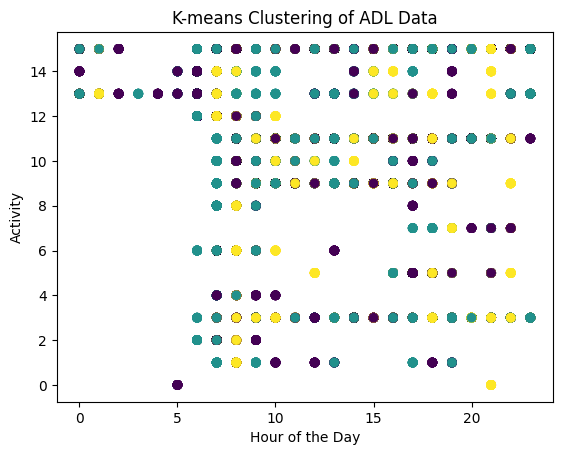

{'Morning': 7, 'Morning activities 1': 8, 'Morning snack': 10, 'Morning activities 2': 12, 'Lunch': 14, 'Afternoon activities': 17, 'Afternoon Snack': 18, 'Evening activities': 20, 'Dinner': 21}


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot  as plt
from statistics import mean

subset_file = pd.read_csv("D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\preprocessing\\cleanedDatasets\\ADL\\data-cleaned.csv")

subset_file.head()

# Convert 'date' and 'time' into datetime format and set it as index
# data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

subset_file['datetime'] = pd.to_datetime(subset_file['datetime'])
subset_file['hour'] = subset_file['datetime'].dt.hour
subset_file['minute'] = subset_file['datetime'].dt.minute
# subset_file.set_index('datetime', inplace=True)

# Considering less active or sedentary activities as 'idle' times, replace with your conditions
idle_activities = ['Study', 'Watch_TV', 'Personal_Hygiene', 'Bed_to_Toilet'] 
subset_file['idle'] = subset_file['activity_name'].isin(idle_activities).astype(int)

# Label encoding string fields
encoder = LabelEncoder()
subset_file['activity_name'] = encoder.fit_transform(subset_file['activity_name'])
subset_file['user_id'] = encoder.fit_transform(subset_file['user_id'])

# Selecting features for clustering
X = subset_file[['hour', 'minute']]

kmeans = KMeans(n_clusters=3, random_state=42)
subset_file['cluster'] = kmeans.fit_predict(X)

subset_file.head()

plt.scatter(subset_file['hour'], subset_file['activity_name'], c=subset_file['cluster'])
plt.xlabel('Hour of the Day')
plt.ylabel('Activity')
plt.title('K-means Clustering of ADL Data')
plt.show()

time_slots = [7, 8, 10, 12, 14, 16, 18, 20, 21, 22]

# Initialize an empty dictionary to store the recommended meal times for each cluster and time slot
meal_times_recommendations = {}

# Group the data by cluster and time slot and calculate the mean hour for each group
for cluster_id in range(3):
    cluster_data = subset_file[subset_file['cluster'] == cluster_id]
    cluster_recommendations = []
    
    for i in range(len(time_slots) - 1):
        start_time = time_slots[i]
        end_time = time_slots[i + 1]
        
        # Get the mean hour for the current time slot in the cluster
        mean_hour = cluster_data[(cluster_data['hour'] >= start_time) & (cluster_data['hour'] < end_time)]['hour'].mean()
        cluster_recommendations.append(round(mean_hour))
    
    meal_times_recommendations[f'Cluster {cluster_id + 1}'] = cluster_recommendations

# Convert the dictionary to a DataFrame for easier visualization
recommendations_df = pd.DataFrame(meal_times_recommendations)
recommendations_df.index = ['Morning', 'Morning activities 1', 'Morning snack', 'Morning activities 2', 'Lunch', 'Afternoon activities', 'Afternoon Snack', 'Evening activities', 'Dinner']

user_timetable = {
    'Morning': [7],
    'Morning activities 1': [8],
    'Morning snack': [10], 
    'Morning activities 2': [11],
    'Lunch': [13], 
    'Afternoon activities': [14], 
    'Afternoon Snack': [16],
    'Evening activities': [17], 
    'Dinner': [19]
}

for index, row in recommendations_df.iterrows():
    cluster_1 = row['Cluster 1']
    cluster_2 = row['Cluster 2']
    cluster_3 = row['Cluster 3']
    mean_time = round((cluster_1 + cluster_2 + cluster_3)/3)
    user_timetable[row.name] = mean_time

print(user_timetable)


In [13]:
import sqlalchemy

dbEngine=sqlalchemy.create_engine("sqlite:///" + "D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\\rating.db")
ratings = pd.read_sql('select * from rating', dbEngine)

dbEngine_1=sqlalchemy.create_engine("sqlite:///" + "D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\profile.db")
users = pd.read_sql('select * from profile', dbEngine_1)

Visualising Kmeans clustering

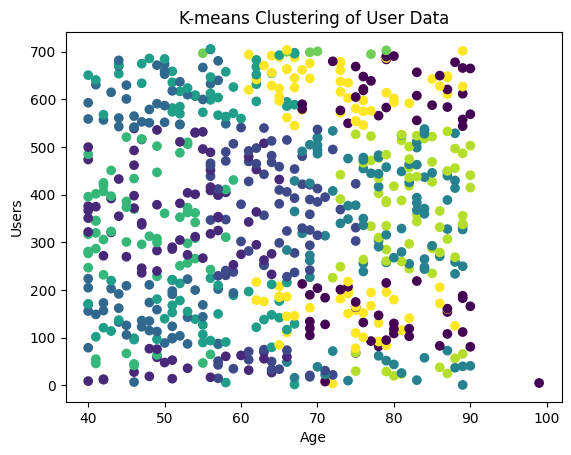

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot  as plt
from statistics import mean
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

N_CLUSTERS = 10

all_foods = pd.read_csv("D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\preprocessing\cleanedDatasets\\food_data_cleaned.csv")
users_df = pd.DataFrame(users)
ratings_df = pd.DataFrame(ratings)

# Choosing similar users by features: age, weight, illness
users_df_copy = users_df[['age', 'weight', 'illness']]

# Label encoding the features
encoder = LabelEncoder()
users_df_copy['age'] = encoder.fit_transform(users_df_copy['age'])
users_df_copy['weight'] = encoder.fit_transform(users_df_copy['weight'])
users_df_copy['illness'] = encoder.fit_transform(users_df_copy['illness'])
data_scalar = StandardScaler().fit_transform(users_df_copy)

# KMeans clustering
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=24)
cluster_labels = kmeans.fit_predict(data_scalar)
users_df['cluster'] = cluster_labels

plt.scatter(users_df['age'], users_df['id'], c=users_df['cluster'])
plt.xlabel('Age')
plt.ylabel('Users')
plt.title('K-means Clustering of User Data')
plt.show()

Visualising Decision trees in Random Forest Classifier

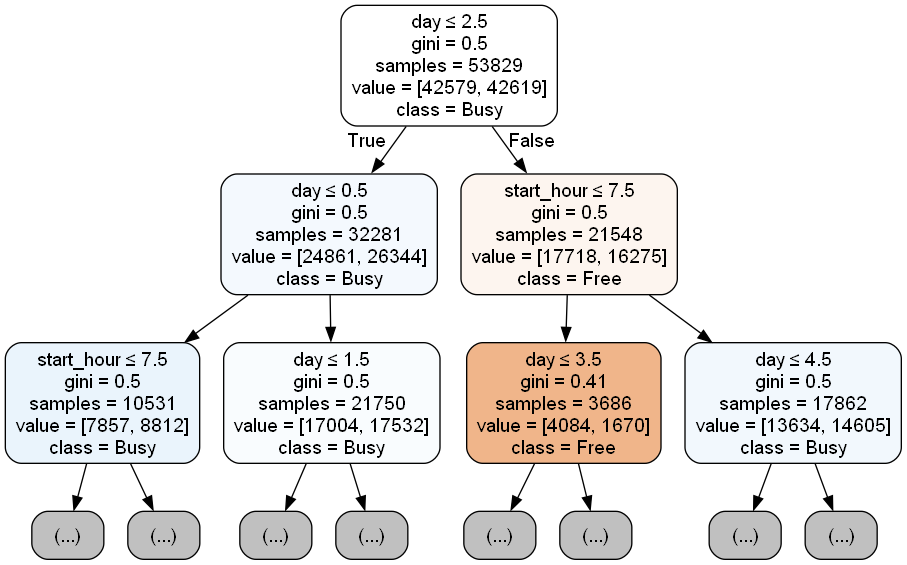

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import sqlalchemy
from subprocess import call
from IPython.display import Image

dbEngine=sqlalchemy.create_engine("sqlite:///" + "D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\\adl.db")
user_adl_df = pd.read_sql('select * from adl', dbEngine)

user_adl_df['day'] = pd.to_datetime(user_adl_df['start_datetime']).dt.day_of_week
user_adl_df['start_hour'] = pd.to_datetime(user_adl_df['start_datetime']).dt.hour
user_adl_df['activity'] = [1 if activity in 'No' else 0 for activity in user_adl_df['activity']]

# Identify feature and target variables
X = user_adl_df[['day', 'start_hour']]
y = user_adl_df['activity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = pd.concat([X_train, y_train], axis=1)
majority_activity = train_data[train_data['activity'] == 0]
minority_activity = train_data[train_data['activity'] == 1]

minority_oversampled = resample(minority_activity, replace=True, n_samples=len(majority_activity), random_state=29)
sampled_activities = pd.concat([majority_activity, minority_oversampled])

X_train_sampled = sampled_activities.drop('activity', axis=1)
y_train_sampled = sampled_activities['activity']

# Train model
model = RandomForestClassifier()
model.fit(X_train_sampled, y_train_sampled)

estimator = model.estimators_[0]
max_depth_to_visualize = 2

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train_sampled.columns,
                class_names = ['Free', 'Busy'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, special_characters=True, max_depth=max_depth_to_visualize)

graphviz_path = "C:\\Program Files\\Graphviz\\bin"  
os.environ["PATH"] += os.pathsep + graphviz_path

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

# Display in jupyter notebook
Image(filename = 'tree.png')


Visualising CASAS ADL Dataset

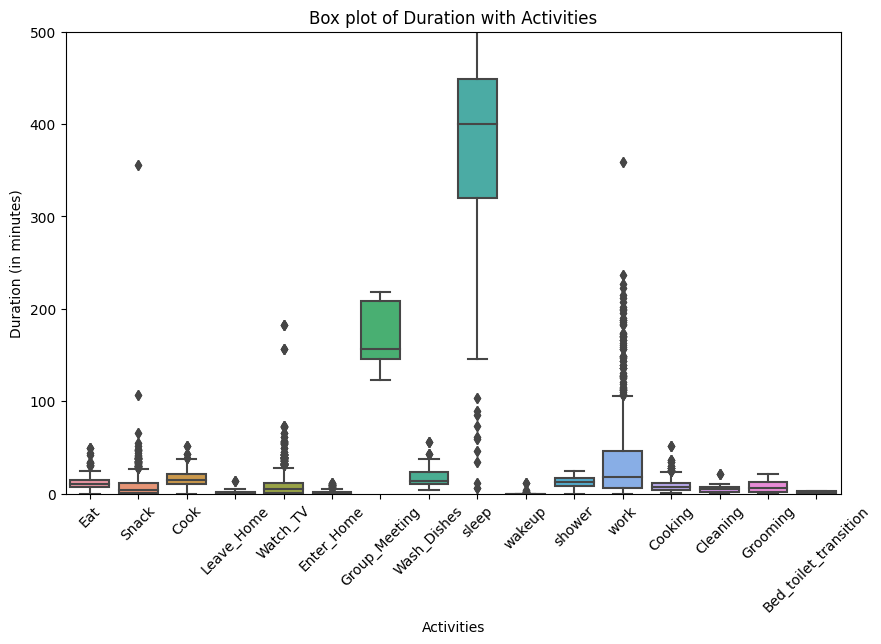

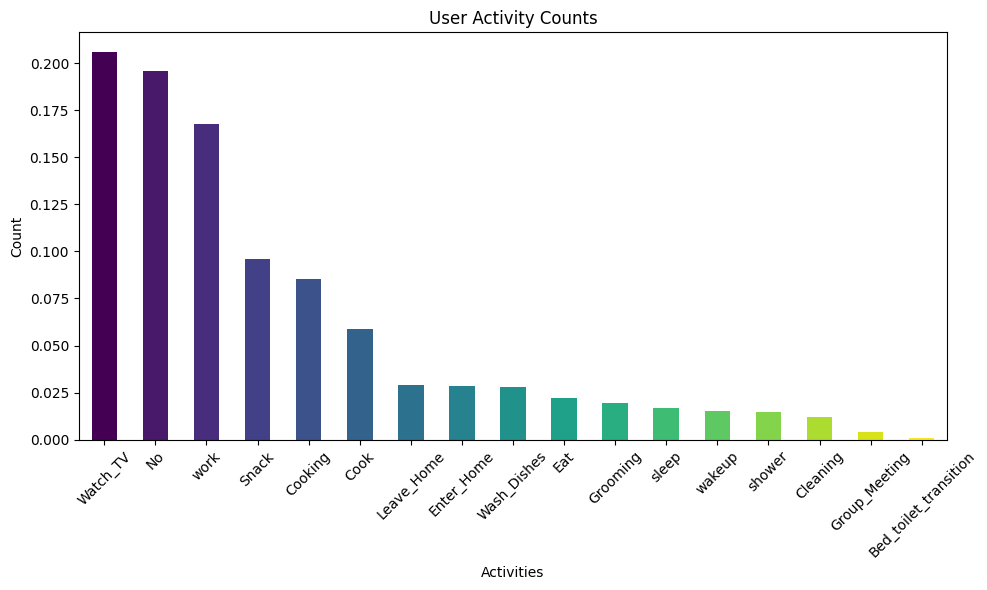

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\preprocessing\cleanedDatasets\ADL\data-user-cleaned.csv")
# df = pd.read_csv("D:\Varshini\CourseWork\Dissertation\Implementation\Github\Recommendation_Dissertation\\backend\preprocessing\datasets\Activity_predictor\\request\data-cleaned.csv")

df_temp = df[df['activity'] != 'No']

df.head()
activity_counts = df['activity'].value_counts(normalize=True)
gradient_colors = np.linspace(0, 1, len(activity_counts))
colors = [plt.cm.viridis(color) for color in gradient_colors]

data = pd.concat([df_temp['duration'], df_temp['activity']], axis=1)
f, ax = plt.subplots(figsize = (10,6))
fig = sns.boxplot(x='activity', y='duration', data=data)
ax.set(xlabel='Activities',
       ylabel='Duration (in minutes)',
       title='Box plot of Duration with Activities')
plt.xticks(rotation=45)
fig.axis(ymin=0, ymax=500)

plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color=colors)
plt.xlabel('Activities')
plt.ylabel('Count')
plt.title('User Activity Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


UML Diagrams

Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
parsing D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\models\\Model.py...


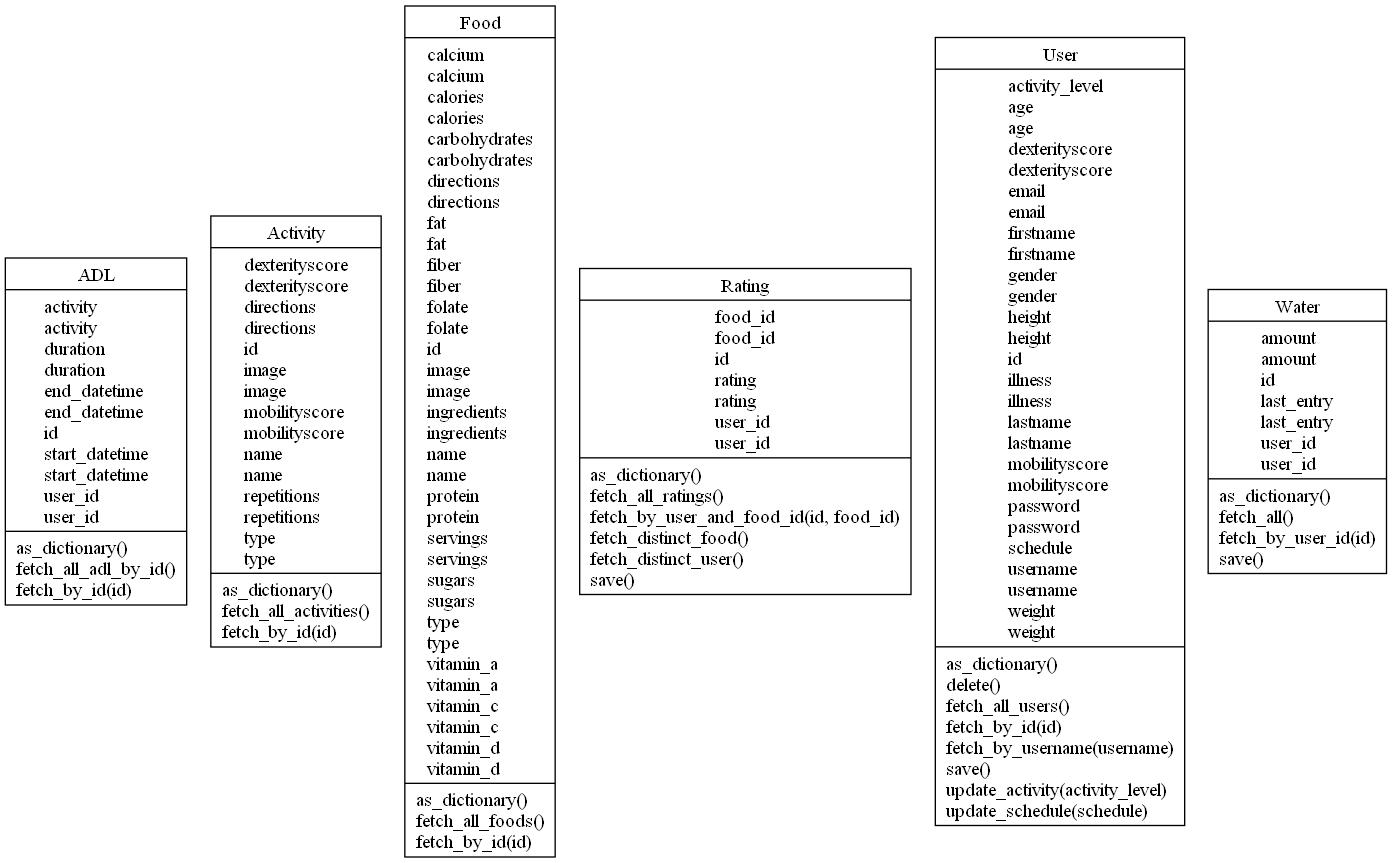

In [7]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import sqlalchemy
from subprocess import call
from IPython.display import Image
import os

graphviz_path = "C:\\Program Files\\Graphviz\\bin"  
os.environ["PATH"] += os.pathsep + graphviz_path

!pyreverse -o png -p myUml D:\\Varshini\\CourseWork\\Dissertation\\Implementation\\Github\\Recommendation_Dissertation\\backend\\models\\Model.py

# Display in jupyter notebook
Image(filename = 'classes_myUml.png')

